In [3]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
conce = pd.read_csv("concrete.csv")

In [7]:
conce

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [10]:
conce.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [11]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [15]:
column_names = list(conce.columns)
predictors = column_names[0:8]
target = column_names[8]

first_model = prep_model([8,50,1])
first_model.fit(np.array(conce[predictors]),np.array(conce[target]),epochs=900)
pred_train = first_model.predict(np.array(conce[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-conce[target])**2))
print(rmse_value)

Epoch 1/900
1030/1030 [==============================] - 0s 173us/step - loss: 600.2489 - accuracy: 9.7087e-04
Epoch 2/900
1030/1030 [==============================] - 0s 73us/step - loss: 221.8127 - accuracy: 0.0000e+00
Epoch 3/900
1030/1030 [==============================] - 0s 51us/step - loss: 154.6372 - accuracy: 0.0000e+00
Epoch 4/900
1030/1030 [==============================] - 0s 56us/step - loss: 118.6029 - accuracy: 0.0000e+00
Epoch 5/900
1030/1030 [==============================] - 0s 56us/step - loss: 110.6256 - accuracy: 0.0000e+00
Epoch 6/900
1030/1030 [==============================] - 0s 78us/step - loss: 95.2369 - accuracy: 0.0000e+00
Epoch 7/900
1030/1030 [==============================] - 0s 85us/step - loss: 92.0495 - accuracy: 0.0000e+00
Epoch 8/900
1030/1030 [==============================] - 0s 51us/step - loss: 89.1326 - accuracy: 0.0000e+00
Epoch 9/900
1030/1030 [==============================] - 0s 52us/step - loss: 80.2099 - accuracy: 0.0000e+00
Epoch 10/900


1030/1030 [==============================] - 0s 64us/step - loss: 42.9652 - accuracy: 0.0000e+00
Epoch 76/900
1030/1030 [==============================] - 0s 75us/step - loss: 43.7904 - accuracy: 9.7087e-04
Epoch 77/900
1030/1030 [==============================] - 0s 74us/step - loss: 45.2035 - accuracy: 0.0019
Epoch 78/900
1030/1030 [==============================] - 0s 73us/step - loss: 43.7854 - accuracy: 9.7087e-04
Epoch 79/900
1030/1030 [==============================] - 0s 70us/step - loss: 51.0399 - accuracy: 0.0000e+00
Epoch 80/900
1030/1030 [==============================] - 0s 71us/step - loss: 40.8082 - accuracy: 0.0000e+00
Epoch 81/900
1030/1030 [==============================] - 0s 65us/step - loss: 41.5248 - accuracy: 0.0019
Epoch 82/900
1030/1030 [==============================] - 0s 65us/step - loss: 42.3728 - accuracy: 0.0029
Epoch 83/900
1030/1030 [==============================] - 0s 66us/step - loss: 44.3619 - accuracy: 0.0000e+00
Epoch 84/900
1030/1030 [===========

1030/1030 [==============================] - 0s 50us/step - loss: 39.5866 - accuracy: 0.0000e+00
Epoch 150/900
1030/1030 [==============================] - 0s 44us/step - loss: 43.2538 - accuracy: 0.0000e+00
Epoch 151/900
1030/1030 [==============================] - 0s 65us/step - loss: 39.2967 - accuracy: 0.0019
Epoch 152/900
1030/1030 [==============================] - 0s 63us/step - loss: 39.4482 - accuracy: 9.7087e-04
Epoch 153/900
1030/1030 [==============================] - 0s 60us/step - loss: 38.5991 - accuracy: 9.7087e-04
Epoch 154/900
1030/1030 [==============================] - 0s 64us/step - loss: 40.9730 - accuracy: 9.7087e-04
Epoch 155/900
1030/1030 [==============================] - 0s 60us/step - loss: 38.0942 - accuracy: 0.0019
Epoch 156/900
1030/1030 [==============================] - 0s 60us/step - loss: 38.6452 - accuracy: 9.7087e-04
Epoch 157/900
1030/1030 [==============================] - 0s 60us/step - loss: 39.1717 - accuracy: 0.0019
Epoch 158/900
1030/1030 [==

1030/1030 [==============================] - 0s 64us/step - loss: 36.4776 - accuracy: 0.0000e+00
Epoch 224/900
1030/1030 [==============================] - 0s 64us/step - loss: 38.6768 - accuracy: 9.7087e-04
Epoch 225/900
1030/1030 [==============================] - 0s 65us/step - loss: 36.1551 - accuracy: 9.7087e-04
Epoch 226/900
1030/1030 [==============================] - 0s 66us/step - loss: 40.7535 - accuracy: 0.0019
Epoch 227/900
1030/1030 [==============================] - 0s 63us/step - loss: 37.0903 - accuracy: 0.0019
Epoch 228/900
1030/1030 [==============================] - 0s 65us/step - loss: 35.6172 - accuracy: 0.0000e+00
Epoch 229/900
1030/1030 [==============================] - 0s 64us/step - loss: 36.2229 - accuracy: 0.0000e+00
Epoch 230/900
1030/1030 [==============================] - 0s 65us/step - loss: 39.2066 - accuracy: 0.0019
Epoch 231/900
1030/1030 [==============================] - 0s 64us/step - loss: 39.9278 - accuracy: 0.0000e+00
Epoch 232/900
1030/1030 [==

1030/1030 [==============================] - 0s 62us/step - loss: 39.1714 - accuracy: 9.7087e-04
Epoch 298/900
1030/1030 [==============================] - 0s 64us/step - loss: 36.5783 - accuracy: 0.0019
Epoch 299/900
1030/1030 [==============================] - 0s 80us/step - loss: 33.9402 - accuracy: 0.0000e+00
Epoch 300/900
1030/1030 [==============================] - 0s 93us/step - loss: 33.1645 - accuracy: 0.0000e+00
Epoch 301/900
1030/1030 [==============================] - 0s 68us/step - loss: 37.1339 - accuracy: 9.7087e-04
Epoch 302/900
1030/1030 [==============================] - 0s 64us/step - loss: 33.3347 - accuracy: 0.0000e+00
Epoch 303/900
1030/1030 [==============================] - 0s 66us/step - loss: 33.3576 - accuracy: 9.7087e-04
Epoch 304/900
1030/1030 [==============================] - 0s 62us/step - loss: 37.2515 - accuracy: 0.0029
Epoch 305/900
1030/1030 [==============================] - 0s 68us/step - loss: 35.2873 - accuracy: 9.7087e-04
Epoch 306/900
1030/1030

1030/1030 [==============================] - 0s 67us/step - loss: 31.2457 - accuracy: 0.0000e+00
Epoch 372/900
1030/1030 [==============================] - 0s 69us/step - loss: 31.3396 - accuracy: 0.0019
Epoch 373/900
1030/1030 [==============================] - 0s 63us/step - loss: 31.0003 - accuracy: 0.0039
Epoch 374/900
1030/1030 [==============================] - 0s 69us/step - loss: 32.5121 - accuracy: 9.7087e-04
Epoch 375/900
1030/1030 [==============================] - 0s 67us/step - loss: 32.5819 - accuracy: 9.7087e-04
Epoch 376/900
1030/1030 [==============================] - 0s 64us/step - loss: 34.1773 - accuracy: 0.0000e+00
Epoch 377/900
1030/1030 [==============================] - 0s 69us/step - loss: 33.7596 - accuracy: 0.0000e+00
Epoch 378/900
1030/1030 [==============================] - 0s 68us/step - loss: 32.9487 - accuracy: 0.0019
Epoch 379/900
1030/1030 [==============================] - 0s 67us/step - loss: 31.9342 - accuracy: 9.7087e-04
Epoch 380/900
1030/1030 [==

1030/1030 [==============================] - 0s 61us/step - loss: 30.3789 - accuracy: 0.0029
Epoch 446/900
1030/1030 [==============================] - 0s 61us/step - loss: 29.6958 - accuracy: 0.0029
Epoch 447/900
1030/1030 [==============================] - 0s 68us/step - loss: 29.6834 - accuracy: 9.7087e-04
Epoch 448/900
1030/1030 [==============================] - 0s 99us/step - loss: 31.1419 - accuracy: 0.0019
Epoch 449/900
1030/1030 [==============================] - 0s 102us/step - loss: 36.5260 - accuracy: 9.7087e-04
Epoch 450/900
1030/1030 [==============================] - 0s 95us/step - loss: 32.4737 - accuracy: 0.0019
Epoch 451/900
1030/1030 [==============================] - 0s 95us/step - loss: 29.8403 - accuracy: 0.0019
Epoch 452/900
1030/1030 [==============================] - 0s 95us/step - loss: 30.6148 - accuracy: 9.7087e-04
Epoch 453/900
1030/1030 [==============================] - 0s 95us/step - loss: 30.2793 - accuracy: 9.7087e-04
Epoch 454/900
1030/1030 [=========

1030/1030 [==============================] - 0s 61us/step - loss: 30.9734 - accuracy: 0.0019
Epoch 520/900
1030/1030 [==============================] - 0s 62us/step - loss: 29.9860 - accuracy: 0.0019
Epoch 521/900
1030/1030 [==============================] - 0s 71us/step - loss: 30.0961 - accuracy: 0.0000e+00
Epoch 522/900
1030/1030 [==============================] - 0s 76us/step - loss: 30.7617 - accuracy: 9.7087e-04
Epoch 523/900
1030/1030 [==============================] - 0s 74us/step - loss: 28.8376 - accuracy: 0.0039
Epoch 524/900
1030/1030 [==============================] - 0s 71us/step - loss: 31.0327 - accuracy: 0.0019
Epoch 525/900
1030/1030 [==============================] - 0s 65us/step - loss: 29.7009 - accuracy: 9.7087e-04
Epoch 526/900
1030/1030 [==============================] - 0s 72us/step - loss: 30.4064 - accuracy: 0.0019
Epoch 527/900
1030/1030 [==============================] - 0s 69us/step - loss: 27.5398 - accuracy: 0.0029
Epoch 528/900
1030/1030 [==============

1030/1030 [==============================] - 0s 66us/step - loss: 27.9190 - accuracy: 9.7087e-04
Epoch 595/900
1030/1030 [==============================] - 0s 66us/step - loss: 30.1947 - accuracy: 0.0049
Epoch 596/900
1030/1030 [==============================] - 0s 62us/step - loss: 27.4977 - accuracy: 0.0029
Epoch 597/900
1030/1030 [==============================] - 0s 62us/step - loss: 30.8123 - accuracy: 0.0019
Epoch 598/900
1030/1030 [==============================] - 0s 62us/step - loss: 31.3073 - accuracy: 9.7087e-04
Epoch 599/900
1030/1030 [==============================] - 0s 50us/step - loss: 28.9755 - accuracy: 0.0019
Epoch 600/900
1030/1030 [==============================] - 0s 65us/step - loss: 30.1643 - accuracy: 9.7087e-04
Epoch 601/900
1030/1030 [==============================] - 0s 61us/step - loss: 28.5391 - accuracy: 0.0000e+00
Epoch 602/900
1030/1030 [==============================] - 0s 61us/step - loss: 34.6446 - accuracy: 9.7087e-04
Epoch 603/900
1030/1030 [======

1030/1030 [==============================] - 0s 60us/step - loss: 27.3763 - accuracy: 0.0019
Epoch 669/900
1030/1030 [==============================] - 0s 54us/step - loss: 27.3991 - accuracy: 9.7087e-04
Epoch 670/900
1030/1030 [==============================] - 0s 60us/step - loss: 26.8508 - accuracy: 9.7087e-04
Epoch 671/900
1030/1030 [==============================] - 0s 60us/step - loss: 28.5409 - accuracy: 0.0000e+00
Epoch 672/900
1030/1030 [==============================] - 0s 67us/step - loss: 28.0141 - accuracy: 9.7087e-04
Epoch 673/900
1030/1030 [==============================] - 0s 66us/step - loss: 29.3490 - accuracy: 0.0019
Epoch 674/900
1030/1030 [==============================] - 0s 73us/step - loss: 31.8518 - accuracy: 9.7087e-04
Epoch 675/900
1030/1030 [==============================] - 0s 64us/step - loss: 26.6345 - accuracy: 9.7087e-04
Epoch 676/900
1030/1030 [==============================] - 0s 64us/step - loss: 28.8118 - accuracy: 0.0019
Epoch 677/900
1030/1030 [==

1030/1030 [==============================] - 0s 73us/step - loss: 28.5472 - accuracy: 0.0000e+00
Epoch 744/900
1030/1030 [==============================] - 0s 61us/step - loss: 30.9100 - accuracy: 0.0000e+00
Epoch 745/900
1030/1030 [==============================] - 0s 71us/step - loss: 28.9629 - accuracy: 9.7087e-04
Epoch 746/900
1030/1030 [==============================] - 0s 75us/step - loss: 27.5303 - accuracy: 0.0000e+00
Epoch 747/900
1030/1030 [==============================] - 0s 74us/step - loss: 26.5106 - accuracy: 9.7087e-04
Epoch 748/900
1030/1030 [==============================] - 0s 69us/step - loss: 29.0449 - accuracy: 0.0000e+00
Epoch 749/900
1030/1030 [==============================] - 0s 69us/step - loss: 26.3150 - accuracy: 0.0058
Epoch 750/900
1030/1030 [==============================] - 0s 65us/step - loss: 26.2262 - accuracy: 9.7087e-04
Epoch 751/900
1030/1030 [==============================] - 0s 70us/step - loss: 26.6753 - accuracy: 9.7087e-04
Epoch 752/900
1030/

1030/1030 [==============================] - 0s 52us/step - loss: 30.0570 - accuracy: 0.0000e+00
Epoch 819/900
1030/1030 [==============================] - 0s 53us/step - loss: 27.9606 - accuracy: 0.0019
Epoch 820/900
1030/1030 [==============================] - 0s 58us/step - loss: 26.3275 - accuracy: 0.0000e+00
Epoch 821/900
1030/1030 [==============================] - 0s 57us/step - loss: 29.2891 - accuracy: 0.0029
Epoch 822/900
1030/1030 [==============================] - 0s 56us/step - loss: 27.4917 - accuracy: 0.0019
Epoch 823/900
1030/1030 [==============================] - 0s 52us/step - loss: 28.6456 - accuracy: 0.0019
Epoch 824/900
1030/1030 [==============================] - 0s 101us/step - loss: 27.1830 - accuracy: 0.0019
Epoch 825/900
1030/1030 [==============================] - 0s 125us/step - loss: 33.7302 - accuracy: 9.7087e-04
Epoch 826/900
1030/1030 [==============================] - 0s 133us/step - loss: 31.6341 - accuracy: 0.0039
Epoch 827/900
1030/1030 [===========

1030/1030 [==============================] - 0s 69us/step - loss: 28.3871 - accuracy: 0.0019
Epoch 894/900
1030/1030 [==============================] - 0s 50us/step - loss: 34.2741 - accuracy: 0.0000e+00
Epoch 895/900
1030/1030 [==============================] - 0s 47us/step - loss: 25.3423 - accuracy: 9.7087e-04
Epoch 896/900
1030/1030 [==============================] - 0s 45us/step - loss: 28.6711 - accuracy: 0.0000e+00
Epoch 897/900
1030/1030 [==============================] - 0s 47us/step - loss: 28.7002 - accuracy: 0.0019
Epoch 898/900
1030/1030 [==============================] - 0s 48us/step - loss: 25.0977 - accuracy: 0.0029
Epoch 899/900
1030/1030 [==============================] - 0s 70us/step - loss: 26.4320 - accuracy: 0.0000e+00
Epoch 900/900
1030/1030 [==============================] - 0s 68us/step - loss: 25.2011 - accuracy: 9.7087e-04
4.979417263842736


array([[1.        , 0.95591978],
       [0.95591978, 1.        ]])

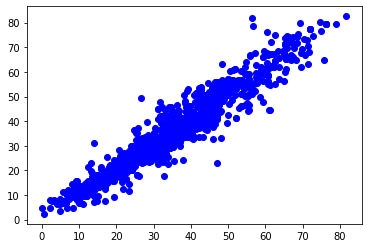

In [16]:
import matplotlib.pyplot as plt
plt.plot(pred_train,conce[target],"bo")
np.corrcoef(pred_train,conce[target]) # we got high correlation 